✅ Exported data to: E:\Data management for vscode\EGFET\Go-EGFET under 0.1XPBS\delta_I_D_vs_concentration.xlsx


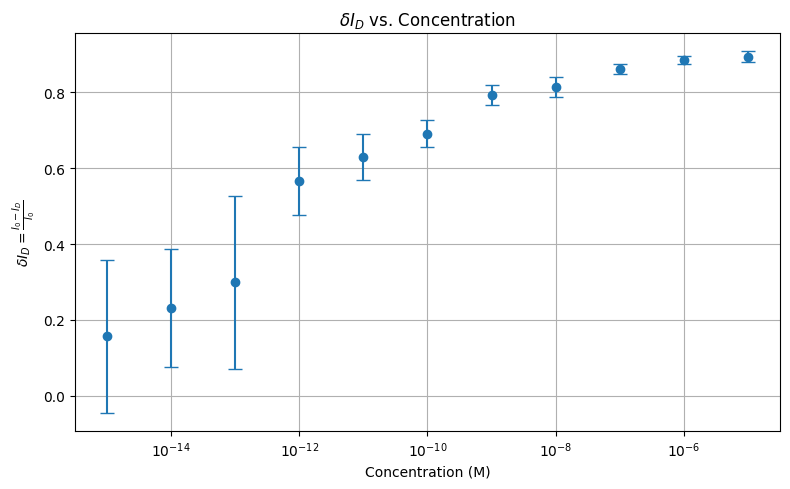


=== δI_D Summary ===
  1 fM: δI_D = 0.1566 ± 0.2020
 10 fM: δI_D = 0.2320 ± 0.1554
100 fM: δI_D = 0.2993 ± 0.2277
  1 pM: δI_D = 0.5660 ± 0.0908
 10 pM: δI_D = 0.6294 ± 0.0602
100 pM: δI_D = 0.6911 ± 0.0352
  1 nM: δI_D = 0.7935 ± 0.0261
 10 nM: δI_D = 0.8137 ± 0.0262
100 nM: δI_D = 0.8614 ± 0.0136
  1 uM: δI_D = 0.8842 ± 0.0105
 10 uM: δI_D = 0.8935 ± 0.0141


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load Excel file ===
file_path = r"E:\Data management for vscode\EGFET\Go-EGFET under 0.1XPBS\sorted_by_concentration.xlsx"
df = pd.read_excel(file_path, header=None)

# === Step 2: Define concentration labels (string) and numeric values for plotting ===
concentrations = ['1 fM', '10 fM', '100 fM', '1 pM', '10 pM', '100 pM', '1 nM', '10 nM', '100 nM', '1 uM', '10 uM']
conc_numeric = [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # in Molar

# === Step 3: Get I_0 from row 34 (index 33), columns 0 and 1 ===
I_0 = df.iloc[33, [0, 1]].mean()

# === Step 4: Extract labels from 3rd row ===
labels = df.iloc[2]

# === Step 5: Compute delta I_D and errors ===
delta_ID_list = []
std_error_list = []

for conc in concentrations:
    matching_cols = labels[labels == conc].index.tolist()
    if matching_cols:
        I_D_vals = df.iloc[33, matching_cols].astype(float)
        I_D_mean = I_D_vals.mean()
        I_D_std = I_D_vals.std(ddof=1)
        delta_I_D = (I_0 - I_D_mean) / I_0
        error = I_D_std / I_0
        delta_ID_list.append(delta_I_D)
        std_error_list.append(error)
    else:
        delta_ID_list.append(None)
        std_error_list.append(None)

# === Step 6: Export to Excel ===
export_df = pd.DataFrame({
    'Concentration': concentrations,
    'Conc_M': conc_numeric,
    'delta_I_D': delta_ID_list,
    'Error': std_error_list
})

output_path = r"E:\Data management for vscode\EGFET\Go-EGFET under 0.1XPBS\delta_I_D_vs_concentration.xlsx"
export_df.to_excel(output_path, index=False)

print("✅ Exported data to:", output_path)

# === Step 7: Plot in Jupyter ===
# Filter out None values for plotting
valid = [i for i in range(len(conc_numeric)) if delta_ID_list[i] is not None]
x = np.array([conc_numeric[i] for i in valid])
y = np.array([delta_ID_list[i] for i in valid])
yerr = np.array([std_error_list[i] for i in valid])

plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=5)
plt.xscale('log')
plt.xlabel("Concentration (M)")
plt.ylabel(r"$\delta I_D = \frac{I_0 - I_D}{I_0}$")
plt.title(r"$\delta I_D$ vs. Concentration")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Step 8: Print the values with error bars ===
print("\n=== δI_D Summary ===")
for c, d, e in zip(concentrations, delta_ID_list, std_error_list):
    if d is not None:
        print(f"{c:>6}: δI_D = {d:.4f} ± {e:.4f}")
    else:
        print(f"{c:>6}: No data")



C:\Users\chris\AppData\Local\Temp\ipykernel_19692\1153234407.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


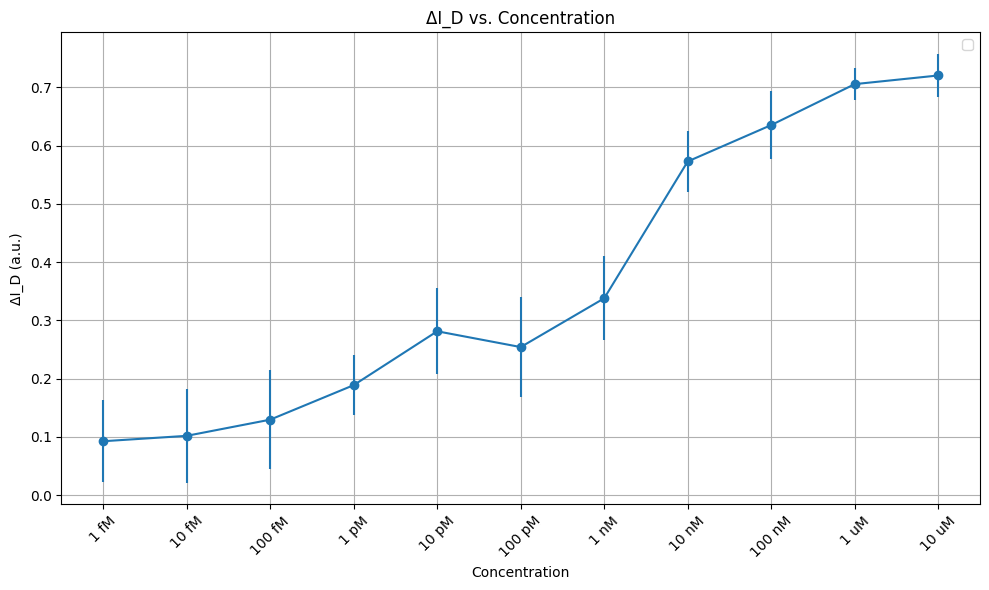

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\chris\OneDrive\Desktop\Book12Cali.xlsx"

excel_data = pd.ExcelFile(file_path)
df = excel_data.parse('Sheet2')

data = df.iloc[2:].copy()

concentrations = data["Concentration"]

pbs_1x = data[r"ΔI\-(D)"].astype(float)
pbs_1x_err = data["Error"].astype(float)

pbs_0_1x = data[r"ΔI\-(D).1"].astype(float)
pbs_0_1x_err = data["Unnamed: 6"].astype(float)

di = data[r"ΔI\-(D).2"].astype(float)
di_err = data["Unnamed: 9"].astype(float)

plt.figure(figsize=(10, 6))
plt.errorbar(concentrations, pbs_1x, yerr=pbs_1x_err, fmt='o-')


plt.xlabel('Concentration')
plt.ylabel('ΔI_D (a.u.)')
plt.title('ΔI_D vs. Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
